# Overview
#### Context

We download the SMS Spam Collection(dataset) from Kaggle.
The set is a csv file contains two kinds of messages: 'ham' for normal message and 'spam' for junk message.
Our goal is to try the most popular classification methods on the dataset and find the most efficient one to predict whether a email is normal or not.

#### Content

The original file is a csv file contains 5572 rows and 5 columns, in our project, we focus on the 'v1' column for the label of the message and 'v2' for the raw text of the message. 

# Approach
* Environment Configuration

* Loading Data

* Data Preprocessing

* Data Visualization

* Text Processing

* Applying Classification

* Show Performance

## Environment Configuration

In [1]:
# Show the absolute path of the executable binary for the Python interpreter.
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Loading Data

In [3]:
# Read file and print the head.
sms = pd.read_csv('/Users/ying/Desktop/513_project/Items/spam.csv', encoding = 'latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Preprocessing

#### Eliminating irrelevant data

In [4]:
# Notice that "Unnamed: 2", "Unnamed: 3", "Unnamed: 4" are unrelated.
# Delete the unrelated columns and print the head.
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
sms.head() 

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Renaming variable

In [5]:
# Rename "v2" and "v1" and print a piece of data.
sms = sms.rename(columns = {"v2" : "text", "v1":"label"})
sms[2010: 2020]

,label,text
2010,ham,Dunno lei... I thk mum lazy to go out... I nev...
2011,ham,Do whatever you want. You know what the rules ...
2012,ham,Beautiful Truth against Gravity.. Read careful...
2013,spam,Great News! Call FREEFONE 08006344447 to claim...
2014,ham,Ambrith..madurai..met u in arun dha marrge..re...
2015,ham,Just re read it and I have no shame but tell m...
2016,ham,"Princess, is your kitty shaved or natural?"
2017,ham,"Better than bb. If he wont use it, his wife wi..."
2018,ham,Ya it came a while ago
2019,ham,From tomorrow onwards eve 6 to 3 work.


In [6]:
# Replace ham with 0 and spam with 1.
sms = sms.replace(['ham','spam'], [0, 1])
sms.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Data Visualization

In [7]:
sms.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      4825   4516                             Sorry, I'll call later   30
1       747    653  Please call our customer service representativ...    4

#### Draw histograms and pie charts to show the amount and percentage of each types of messages.

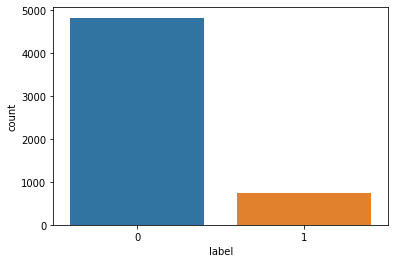

In [8]:
# The horizontal axis represents the kind of messages.
# 0(blue) stands for normal messages, 1(orange) stands for junk messages.
# The vertical axis represents the occurrence of a message of a given length.
sns.countplot(data = sms, x = 'label')

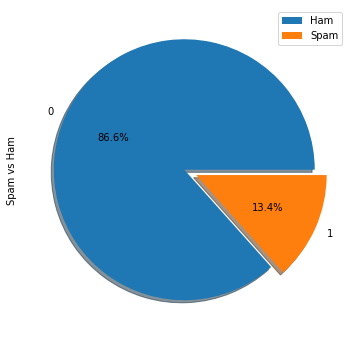

In [9]:
sms["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

#### Draw histograms to show the relationship between the length of the message and the occurrence of the message.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21da2910>]],
      dtype=object)

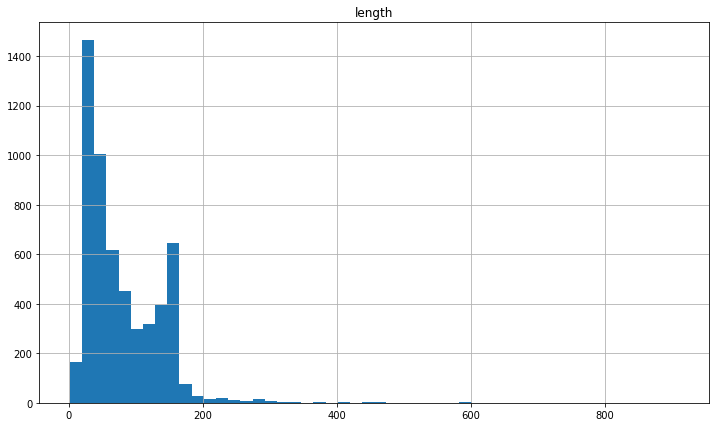

In [10]:
# The horizontal axis represents the length(number of words) of a message.
# The vertical axis represents the occurrence of a message of a given length.
sms['length'] = sms['text'].map(lambda x: len(x))
sms.hist(column = 'length', bins = 50, figsize=(12,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22277190>,
      dtype=object)

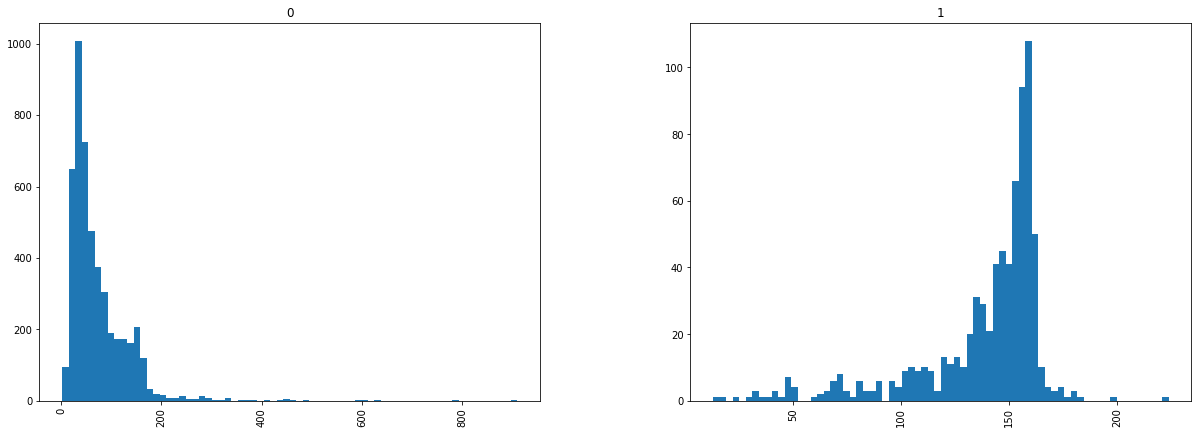

In [11]:
# Draw histograms for 'ham' messages and 'spam' messages.
# The horizontal axis represents the length(number of words) of a message.
# The vertical axis represents the occurrence of a message of a given length.
sms.hist(column = 'length', by = 'label', bins = 70, figsize = (20,7))

In [12]:
# Total ham(0) and spam(1) messages
sms['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

#### Draw WordClouds

In [13]:
# Draw WordClouds for ham words.
ham_words = ' '.join(list(sms[sms['label'] == 0]['text']))
ham_wc = WordCloud(width = 512, height = 512).generate(ham_words)

<function matplotlib.pyplot.show(*args, **kw)>

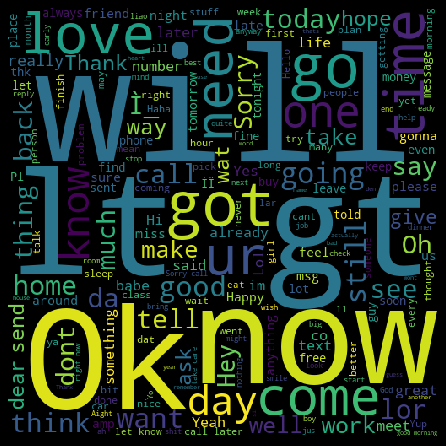

In [14]:
# For a word, the larger the size, the higher the frequency.
plt.figure(figsize = (6, 6), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show

In [15]:
# Draw WordClouds for spam words.
spam_words = ' '.join(list(sms[sms['label'] == 1]['text']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)

<function matplotlib.pyplot.show(*args, **kw)>

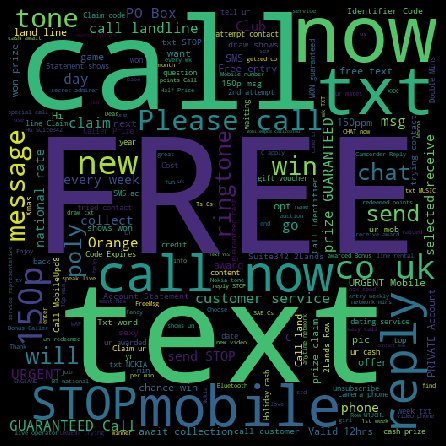

In [16]:
# For a word, the larger the size, the higher the frequency.
plt.figure(figsize = (6, 6), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show

## Text Processing

In [17]:
# Build a corpus
corpus = []
ps = PorterStemmer()

In [18]:
# Show original Messages(top 10)
for i in range(10):
    print (sms['text'][i])
    print('\r')

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more?

In [19]:
# Vectorized text
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(sms['text'])
vectors.shape

(5572, 8672)

#### Process the text, get a new text which could be built ML model on.

In [20]:
for i in range(0, len(sms.text)):

    # Applying Regular Expression
    
    '''
    Replace email addresses with 'emailaddr'
    Replace URLs with 'httpaddr'
    Replace money symbols with 'moneysymb'
    Replace phone numbers with 'phonenumbr'
    Replace numbers with 'numbr'
    '''
    msg = sms['text'][i]
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', sms['text'][i])
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', sms['text'][i])
    msg = re.sub('£|\$', 'moneysymb', sms['text'][i])
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', sms['text'][i])
    msg = re.sub('\d+(\.\d+)?', 'numbr', sms['text'][i])
    
    ''' Remove all punctuations '''
    msg = re.sub('[^\w\d\s]', ' ', sms['text'][i])
    
    if i in range(2):
        print("\t\t\t\t\t MESSAGE ", i)
    
    if i in range(2):
        print("\n After Regular Expression - Message ", i, " : ", msg)
    
    # Each word to lower case
    msg = msg.lower()    
    if i in range(2):
        print("\n Lower case Message ", i, " : ", msg)
    
    # Splitting words to Tokenize
    msg = msg.split()    
    if i in range(2):
        print("\n After Splitting - Message ", i, " : ", msg)
    
    # Stemming with PorterStemmer handling Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    if i in range(2):
        print("\n After Stemming - Message ", i, " : ", msg)
    
    # preparing Messages with Remaining Tokens
    msg = ' '.join(msg)
    if i in range(2):
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")
    
    # Preparing WordVector Corpus
    corpus.append(msg)

					 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 


					 MESSAGE  1

 After Regular Expression - Message  1  :  Ok lar    Joking wif u oni   

 Lower case Message  1  :  ok lar    joking wif u oni   

 After Splitting - Message  1  :  ['ok', 'lar', 'joking', 'wif',

## Applying Classification
    Input : Prepared Sparse Matrix
    Ouput : Labels (Spam or Ham)

#### Convert corpus to sparse matrix

In [21]:
cv = CountVectorizer()

In [22]:
x = cv.fit_transform(corpus).toarray()
y = sms['label']
print (y.value_counts())

0    4825
1     747
Name: label, dtype: int64


In [23]:
x.shape

(5572, 7213)

#### Encoding Labels

In [24]:
le = LabelEncoder()
y = le.fit_transform(y)

#### Splitting to Training and Testing DATA

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [26]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier(n_neighbors = 50)
mnb = MultinomialNB(alpha = 0.2)
dtc = DecisionTreeClassifier(min_samples_split = 7, random_state = 110)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 37, random_state = 110)

#### Try popular classification methods, such as KNN, SVM, NB, LR, RF, DT, on the dataset.

In [27]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [28]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [29]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, x_train, y_train)
    pred = predict(v, x_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

#### Get the results of each method.

In [30]:
predictions_word_vectors = pd.DataFrame.from_items(pred_scores_word_vectors,orient='index', columns=['Score_'])
predictions_word_vectors

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score_
SVC,0.915695
KN,0.851121
NB,0.986547
DT,0.967713
LR,0.975785
RF,0.970404


#### Draw the accurancy of each method.

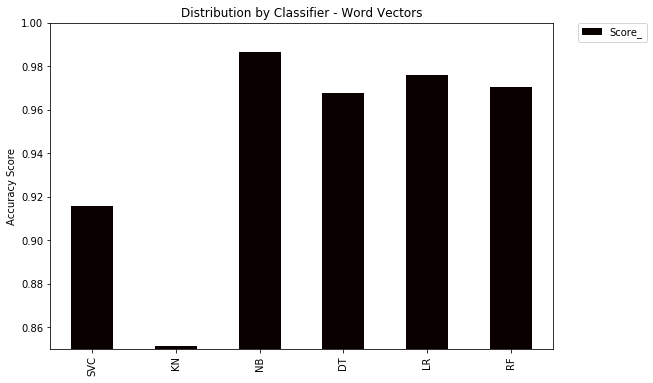

In [31]:
predictions_word_vectors.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center', colormap="hot")
plt.xticks(np.arange(6), predictions_word_vectors.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier - Word Vectors')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
joblib.dump(mnb, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")

Best Model (Naive Bayes) Saved


In [33]:
best = joblib.load('best.pkl')
best

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

## Show Performance

In [34]:
bayes_classifier = MultinomialNB()
bayes_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
y_pred = bayes_classifier.predict(x_test)

#### Show the confusion matrix of Multinomial Naive Bayes method.

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[941,   8],
       [  9, 157]])

#### Show the performance of Multinomial Naive Bayes method.

In [37]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, bayes_classifier.predict(x_test)))
print (classification_report(y_test, bayes_classifier.predict(x_test)))

Accuracy : 0.98475 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.95      0.95      0.95       166

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# Summary

* The original dataset contains normal messages(4825, 86.6%) and junk messages(747, 13.4%).

* By data visualisations, we can see that junk messages usually has a greater length.

* By WordCloud, we can see the high frequency vocabularies of junk messages are different from the hams'.

* Before Machine Learning, we should preprocess the text first.

* After trying 6 classification methods, we find the most efficient method in this case is MNB.
 
* The accuracy of Multinomial Naive Bayes is 98.47%.